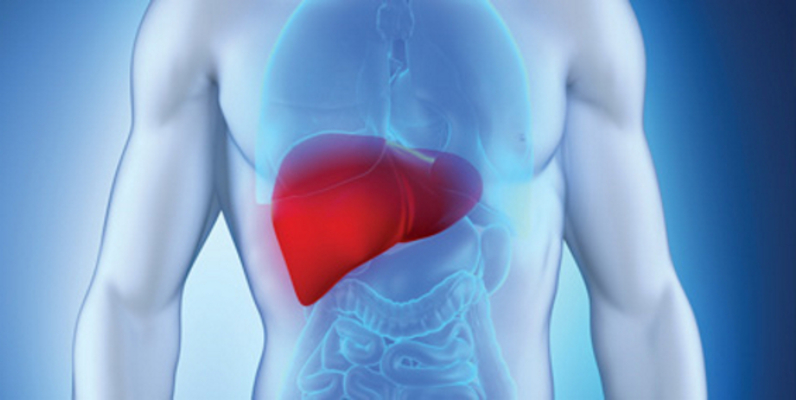


Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, 
such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic 
trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical 
background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and 
Harrington, Counting Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, 
et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the 
randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in 
the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical 
trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost 
to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized 
participants.

Attribute Information
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in 
July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, 
or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)


In [1]:
# Defining the image path and description text
image_path = 'C:/Users/DELL/Downloads/dataset-cover.jpg'
description_text = """
Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, 
such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic 
trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical 
background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and 
Harrington, Counting Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, 
et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the 
randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in 
the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical 
trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost 
to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized 
participants.

Attribute Information
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in 
July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, 
or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)
"""

from IPython.display import display, Image, Markdown
display(Image(filename=image_path))
display(Markdown(description_text))

Data Collection
- Source of dataset
- Research Publication

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer    
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Reading & Uploading the data

In [3]:
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


## Calculating missing values

In [6]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent =  df.isnull().sum() / len(df) * 100
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
missing_values_table(df)

The dataset has 20 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Tryglicerides,136,32.5
Cholesterol,134,32.1
Copper,108,25.8
Drug,106,25.4
Ascites,106,25.4
Hepatomegaly,106,25.4
Spiders,106,25.4
Alk_Phos,106,25.4
SGOT,106,25.4
Platelets,11,2.6


In [8]:
for col in ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']:
    print(col, ':', (df[col].unique()))    

Status : ['D' 'C' 'CL']
Drug : ['D-penicillamine' 'Placebo' nan]
Sex : ['F' 'M']
Ascites : ['Y' 'N' nan]
Hepatomegaly : ['Y' 'N' nan]
Spiders : ['Y' 'N' nan]
Edema : ['Y' 'N' 'S']
Stage : [ 4.  3.  2.  1. nan]


In [9]:
df["Age"] = (df["Age"]/365).astype(int)  ## changing age from days to years
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [10]:
df['Stage'].unique()

array([ 4.,  3.,  2.,  1., nan])

In [11]:
### Cirhosis stage is considered as a categorical variable
df["Stage"] = df["Stage"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int32  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [12]:
df['Stage'].unique()

array(['4.0', '3.0', '2.0', '1.0', 'nan'], dtype=object)

In [13]:
df["Stage"].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
nan      6
Name: Stage, dtype: int64

In [14]:
df.duplicated().sum() ## checking for duplicate rows

0

In [15]:
### Renaming the columns with it's clinical name
df.rename(columns={"Tryglicerides ":"TG" , "Alk_Phos":"ALP", "Prothrombin ":"PT" , "SGOT":"AST"}, inplace=True)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [16]:
df.describe().T  ### Data contains high level of ouliers in some of the variables

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,50.382775,10.481084,26.00,42.0000,51.00,58.00,78.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
ALP,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
AST,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [17]:
df.drop("ID" , axis=1, inplace=True)  ### dropping the ID column as it is not required for analysis

## EDA
#### Univariate Analysis

In [18]:
# Numerical features for distribution plots
numerical_features = ["Age","N_Days",'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',"ALP", 'AST', 
                      'Tryglicerides', 'Platelets', 'Prothrombin']
## for numerical columns we will make a distribution plot

# Categorical features for count plots
categorical_features = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Stage']

## for categorical columns we will make a count plot

In [19]:
def distribution_plots(df, features):
    for feature in features:
        fig = px.histogram(df, x=feature, marginal="box", color_discrete_sequence=['indianred'])
        fig.update_layout(title_text='Distribution of ' + feature, title_x=0.5)
        fig.show()
        print("Skewness: " + str(df[feature].skew()))
        print("Mean: " + str(df[feature].mean()))
        print("Median: " + str(df[feature].median()))
        print("Minimum: " + str(df[feature].min()))
        print("Maximum: " + str(df[feature].max()))

In [20]:
distribution_plots(df, numerical_features)

Skewness: 0.07946622222649796
Mean: 50.38277511961722
Median: 51.0
Minimum: 26
Maximum: 78


Skewness: 0.4726020506759292
Mean: 1917.7822966507176
Median: 1730.0
Minimum: 41
Maximum: 4795


Skewness: 2.717610708740455
Mean: 3.2208133971291866
Median: 1.4
Minimum: 0.3
Maximum: 28.0


Skewness: 3.408525855721416
Mean: 369.51056338028167
Median: 309.5
Minimum: 120.0
Maximum: 1775.0


Skewness: -0.4675265141762801
Mean: 3.4974401913875592
Median: 3.53
Minimum: 1.96
Maximum: 4.64


Skewness: 2.3036399957832616
Mean: 97.64838709677419
Median: 73.0
Minimum: 4.0
Maximum: 588.0


Skewness: 2.9928343153496115
Mean: 1982.6557692307692
Median: 1259.0
Minimum: 289.0
Maximum: 13862.4


Skewness: 1.4491969235882083
Mean: 122.55634615384616
Median: 114.7
Minimum: 26.35
Maximum: 457.25


Skewness: 2.5239024664577845
Mean: 124.70212765957447
Median: 108.0
Minimum: 33.0
Maximum: 598.0


Skewness: 0.6270977603715678
Mean: 257.02457002457004
Median: 251.0
Minimum: 62.0
Maximum: 721.0


Skewness: 2.223276154109735
Mean: 10.731730769230769
Median: 10.6
Minimum: 9.0
Maximum: 18.0


## Based on the above plots, we can see that the data is skewed and has outliers.
- Age is normally distributed no outliers
- N_Days is normally skewed no outliers
- Bilirubin is right skewed  and has outliers indicating that there are more patients with low bilirubin levels
- Cholesterol is right skewed and has outliers. however, many patients have missing cholesterol values.
- Albumin is left skewed and has outliers indicating that there are more patients with low albumin levels
- prothrombin is right skewed and has outliers
- somewhat normal distribution but with a right ske and has outliers
- Triglycerides is right skewed and has outliers
- AST is right skewed and has outliers indicating more patients with low AST levels, however,
- many patients have missing AST values.
- ALP is right skewed and has outliers as Ast, however, 
- Copper is right skewed and has outliers. however, many patients have missing copper values.

In [21]:
categorical_features

['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Stage']

In [22]:
def count_plots(df,feature):
    for feature in categorical_features:
        fig = px.histogram(df, x=feature,text_auto=True, color_discrete_sequence=['indianred'])
        fig.update_layout(title_text='Count of ' + feature, title_x=0.5)
        fig.show()
    

In [23]:
count_plots(df, categorical_features)   

### Based on the above EDA
-  Sex more female than male
-  more patients with no Ascites
- slightly more patients with Hepatomegaly
- more patients with no Spiders
- majority of patients have Edema, some are on Diuretic therapy
-  Drug has missing values the two drugs (D-penicillamine and Placebo) are fairly evenly distributed among those with data.
- Stage Most patients are in the later stages of cirrhosis (stages 3 and 4).

## Insights for Medical Doctors:
- Liver Function Tests (LFTs): The distributions of bilirubin, albumin, AST, and ALP suggest varying degrees of liver impairment. Patients with extremely high values in these tests may require closer monitoring.
- Nutritional Status: Albumin levels, although mostly in the normal range, can indicate nutritional status and liver synthesis capacity.
- Ascites and Edema: The presence of ascites and edema in a significant number of patients suggests advanced liver disease, which can guide treatment decisions.

In [24]:
correlation_matrix = df[numerical_features].corr()
fig = px.imshow(correlation_matrix, color_continuous_scale=px.colors.sequential.Blues , 
            title="Correlation Matrix of Numerical Features" ,
            width=1000, height=800 ,template="plotly_dark",text_auto=True)
fig.show()

### Imputing the missing values & Remove any outliers based on the above EDA

In [25]:
df.isnull().sum() /df.shape[0] * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
ALP              25.358852
AST              25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             0.000000
dtype: float64

In [26]:
##'Platelets' and 'Prothrombin' were imputed with their median values. Right skewed and had outliers.
## 'Stage' was imputed with its mode. It is a categorical variable and had no outliers.
df['Platelets'].fillna(df["Platelets"].median(), inplace=True)
df['Prothrombin'].fillna(df["Prothrombin"].median(), inplace=True)
df["Stage"].fillna(df["Stage"].mode()[0], inplace=True)
df.isnull().sum() /df.shape[0] * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
ALP              25.358852
AST              25.358852
Tryglicerides    32.535885
Platelets         0.000000
Prothrombin       0.000000
Stage             0.000000
dtype: float64

##### Columns like 
'Tryglicerides', 'Cholesterol', 'Copper', 'Drug', 'Ascites', 
'Hepatomegaly', 'Spiders', 'AST', 'ALP': These columns have a substantial
 amount of missing data (over 25%).

In [27]:
df[df["Stage"]=="nan"]  ## removing these rows as they don't have any clinical significance

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Tryglicerides,Platelets,Prothrombin,Stage
312,4062,C,NaN,60,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,nan
316,3030,C,NaN,62,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,nan
318,41,D,NaN,46,F,NaN,NaN,NaN,N,5.0,NaN,2.93,NaN,NaN,NaN,NaN,260.0,10.4,nan
321,2011,D,NaN,64,F,NaN,NaN,NaN,N,1.1,NaN,3.69,NaN,NaN,NaN,NaN,139.0,10.5,nan
333,466,D,NaN,56,F,NaN,NaN,NaN,N,7.1,NaN,3.51,NaN,NaN,NaN,NaN,721.0,11.8,nan
336,2286,D,NaN,56,F,NaN,NaN,NaN,N,1.8,NaN,3.64,NaN,NaN,NaN,NaN,141.0,10.0,nan


In [28]:
indices_to_remove = [312, 316, 318, 321, 333, 336]
df.drop(indices_to_remove, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         412 non-null    int64  
 1   Status         412 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            412 non-null    int32  
 4   Sex            412 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          412 non-null    object 
 9   Bilirubin      412 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        412 non-null    float64
 12  Copper         310 non-null    float64
 13  ALP            312 non-null    float64
 14  AST            312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      412 non-null    float64
 17  Prothrombin    412 non-null    float64
 18  Stage     

In [29]:
df["Stage"].astype(float,errors='ignore')
df["Stage"].astype(int,errors='ignore')
df["Stage"].astype(str,errors='ignore')

0      4.0
1      3.0
2      4.0
3      4.0
4      3.0
      ... 
407    3.0
408    4.0
409    3.0
410    3.0
411    4.0
Name: Stage, Length: 412, dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         412 non-null    int64  
 1   Status         412 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            412 non-null    int32  
 4   Sex            412 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          412 non-null    object 
 9   Bilirubin      412 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        412 non-null    float64
 12  Copper         310 non-null    float64
 13  ALP            312 non-null    float64
 14  AST            312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      412 non-null    float64
 17  Prothrombin    412 non-null    float64
 18  Stage     

In [31]:
df["Drug"].unique()

array(['D-penicillamine', 'Placebo', nan], dtype=object)

In [32]:
## Categorical Variables (Drug, Ascites, Hepatomegaly, Spiders): Impute with the mode or a separate category 'Unknown'.
df[["Drug","Ascites","Hepatomegaly", "Spiders"]] = df[["Drug", "Ascites", "Hepatomegaly", "Spiders"]].fillna("Unknown")

In [33]:
df.isnull().sum() /df.shape[0] * 100

N_Days            0.000000
Status            0.000000
Drug              0.000000
Age               0.000000
Sex               0.000000
Ascites           0.000000
Hepatomegaly      0.000000
Spiders           0.000000
Edema             0.000000
Bilirubin         0.000000
Cholesterol      31.067961
Albumin           0.000000
Copper           24.757282
ALP              24.271845
AST              24.271845
Tryglicerides    31.553398
Platelets         0.000000
Prothrombin       0.000000
Stage             0.000000
dtype: float64

In [34]:
## Imputing the missing values with KNN imputer
num_missing = ["Cholesterol", "Copper", "ALP", "AST", "Tryglicerides"]
imputer = KNNImputer(n_neighbors=5)
df[num_missing] = imputer.fit_transform(df[num_missing])

In [35]:
## Removing the outliers
from datasist.structdata import detect_outliers
outliers_indices = detect_outliers(df, 0, numerical_features)
df.drop(outliers_indices, axis=0, inplace=True)

In [36]:
df.reset_index(drop=True, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         258 non-null    int64  
 1   Status         258 non-null    object 
 2   Drug           258 non-null    object 
 3   Age            258 non-null    int32  
 4   Sex            258 non-null    object 
 5   Ascites        258 non-null    object 
 6   Hepatomegaly   258 non-null    object 
 7   Spiders        258 non-null    object 
 8   Edema          258 non-null    object 
 9   Bilirubin      258 non-null    float64
 10  Cholesterol    258 non-null    float64
 11  Albumin        258 non-null    float64
 12  Copper         258 non-null    float64
 13  ALP            258 non-null    float64
 14  AST            258 non-null    float64
 15  Tryglicerides  258 non-null    float64
 16  Platelets      258 non-null    float64
 17  Prothrombin    258 non-null    float64
 18  Stage     

- Bilirubin : { < 1.2 : normal, >= 1.2 : high }
- Cholesterol : { < 200: normal, 200 < borderline high <240, >= 240:high }
- Albumin: { < 3.4 : low, 3.4 < normal < 5.4, >= 5.4 : high }
- Copper: < 70 : low, 70 <normal <140, >= 140 : high }
- ALP: <20:low, 20<normal<140, >=140:high
- AST: <10:low, 10<normal<40, >=40:high
- Triglycerides: <150:normal, 150<borderline high<200, 200<high<500, >=500:very high
- Platelets: <150:low, 150<normal<450, >=450:high
- Prothrombin: 11:shortened,11<normal<13,=13:prolonged

In [38]:
df[df["ALP"] >= 140]  ## these values shoukd be filled with median value

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Tryglicerides,Platelets,Prothrombin,Stage
0,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.000000,3.53,143.000000,671.000000,113.150000,72.000000,136.0,10.9,3.0
1,2503,D,Placebo,66,F,N,Y,N,N,0.8,248.000000,3.98,50.000000,944.000000,93.000000,63.000000,251.0,11.0,3.0
2,3762,D,Placebo,53,F,N,Y,Y,N,1.4,259.000000,4.16,46.000000,1104.000000,79.050000,79.000000,258.0,12.0,4.0
3,3577,C,Placebo,45,F,N,N,N,N,0.7,281.000000,3.85,40.000000,1181.000000,88.350000,130.000000,244.0,10.6,3.0
4,3672,C,Placebo,40,F,N,N,N,N,0.7,204.000000,3.66,28.000000,685.000000,72.850000,58.000000,198.0,10.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,681,D,Unknown,67,F,Unknown,Unknown,Unknown,N,1.2,369.510563,2.96,97.648387,1982.655769,122.556346,124.702128,174.0,10.9,3.0
254,1103,C,Unknown,39,F,Unknown,Unknown,Unknown,N,0.9,369.510563,3.83,97.648387,1982.655769,122.556346,124.702128,180.0,11.2,4.0
255,1055,C,Unknown,57,F,Unknown,Unknown,Unknown,N,1.6,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,143.0,9.9,3.0
256,691,C,Unknown,58,F,Unknown,Unknown,Unknown,N,0.8,369.510563,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,3.0


In [39]:
df["ALP"].median()  ### Considered as an outlier

1434.0

In [40]:
df.loc[df["ALP"] >= 140, "ALP"] == 150.0

0      False
1      False
2      False
3      False
4      False
       ...  
253    False
254    False
255    False
256    False
257    False
Name: ALP, Length: 258, dtype: bool

In [41]:
df["ALP"].median()

1434.0

In [42]:
df.loc[df["ALP"] > 420, "ALP"]

0       671.000000
1       944.000000
2      1104.000000
3      1181.000000
4       685.000000
          ...     
253    1982.655769
254    1982.655769
255    1982.655769
256    1982.655769
257    1982.655769
Name: ALP, Length: 253, dtype: float64

In [43]:
# normal range between 44 and 147 IU/L Levels exceeding 2-3 times the upper limit of the normal range 
# (i.e., 280-420 IU/L or higher) in cirrhosis .
bins = [20, 44, 147, float('inf')]   ### Converted to categorical variable as it is containing very high outliers
labels = ['low', 'normal', 'high' ]
df['ALP'] = pd.cut(df['ALP'], bins=bins, labels=labels, right=False)

In [44]:
df["ALP"].value_counts()  

high      258
low         0
normal      0
Name: ALP, dtype: int64

In [45]:
df[df["Cholesterol"] >= 300]  ## these values should be filled with median value"]]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Tryglicerides,Platelets,Prothrombin,Stage
9,3933,C,D-penicillamine,52,F,N,N,N,N,0.8,364.000000,3.70,37.000000,high,170.500000,64.000000,273.0,10.5,2.0
11,3244,D,Placebo,36,F,N,Y,Y,N,3.3,383.000000,3.53,102.000000,high,137.950000,87.000000,234.0,11.0,4.0
12,1350,D,D-penicillamine,33,F,N,Y,N,N,6.8,338.000000,3.26,96.000000,high,151.900000,99.600000,226.0,11.7,4.0
14,4025,C,Placebo,41,F,N,N,N,N,0.6,304.000000,3.93,19.000000,high,71.300000,156.800000,474.0,10.9,2.0
15,2576,C,Placebo,47,F,N,N,N,N,0.5,316.000000,3.65,68.000000,high,187.550000,71.000000,356.0,9.8,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,681,D,Unknown,67,F,Unknown,Unknown,Unknown,N,1.2,369.510563,2.96,97.648387,high,122.556346,124.702128,174.0,10.9,3.0
254,1103,C,Unknown,39,F,Unknown,Unknown,Unknown,N,0.9,369.510563,3.83,97.648387,high,122.556346,124.702128,180.0,11.2,4.0
255,1055,C,Unknown,57,F,Unknown,Unknown,Unknown,N,1.6,369.510563,3.42,97.648387,high,122.556346,124.702128,143.0,9.9,3.0
256,691,C,Unknown,58,F,Unknown,Unknown,Unknown,N,0.8,369.510563,3.75,97.648387,high,122.556346,124.702128,269.0,10.4,3.0


In [46]:
df["Cholesterol"].median() ## Accepted

341.0

In [47]:
df["Cholesterol"].max()  # High cholesterol Accepted as a value

528.0

In [48]:
df["Copper"].max() ## Accepted

178.0

In [49]:
df["Bilirubin"].max() ## Accepted

6.8

In [50]:
df["Albumin"].max() ## Accepted

4.52

In [51]:
df["AST"].max() ## Accepted

205.0

In [52]:
df["Tryglicerides"].max() ## Accepted

195.0

In [53]:
df["Platelets"].max() ## Accepted

493.0

In [54]:
df["Prothrombin"].max() ## Accepted

12.7

In [55]:
### Checking the Correlation of the numerical features after imputation and outlier removal
num_features = ["Age","N_Days",'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'AST', 
                      'Tryglicerides', 'Platelets', 'Prothrombin']
correlation_matrix = df[num_features].corr()
fig = px.imshow(correlation_matrix, color_continuous_scale=px.colors.sequential.Blues , 
            title="Correlation Matrix of Numerical Features" ,
            width=1000, height=800 ,template="plotly_dark",text_auto=True)
fig.show()

## Divariate Analysis

In [56]:
print(num_features)
cat_features = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Stage',"ALP"]
print(cat_features) 

['Age', 'N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'AST', 'Tryglicerides', 'Platelets', 'Prothrombin']
['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Drug', 'Stage', 'ALP']


No of days vs Status

In [57]:
df["Status"].unique()    # numerical vs categorical

array(['CL', 'D', 'C'], dtype=object)

I used this reference to uderstand Anova and when to perferm it 

https://www.scribbr.com/statistics/one-way-anova/#:~:text=ANOVA%2C%20which%20stands%20for%20Analysis,ANOVA%20uses%20two%20independent%20variables.

- The null hypothesis (H0) of ANOVA is that there is no difference among group means. 
- The alternative hypothesis (Ha) is that at least one group differs significantly from the overall mean of the dependent variable.

In [58]:
## independent categorical and dependent numerical 
from scipy.stats import f_oneway ,stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
def anova_test(df, feature):
    status_c = df[df["Status"]=="C"][feature]
    status_cl = df[df["Status"]=="CL"][feature]
    status_d = df[df["Status"]=="D"][feature]
    f_statistic,p_value =stats.f_oneway(status_c, status_cl, status_d)
    print(f'ANOVA F-statistic: {f_statistic:.2f}')
    print(f'ANOVA p-value: {p_value:.4f}')
    ## Tukey's test for pairwise comparisons
    tukey_results = pairwise_tukeyhsd(df[feature], df['Status'])
    print(tukey_results)

In [59]:
fig = px.box(df, x="Status", y="N_Days", color="Status", color_discrete_sequence=['red', 'green', 'blue'])
fig.show()

# Perform ANOVA to check if the means of the groups are equal
anova_test(df, "N_Days")

C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ANOVA F-statistic: 10.48
ANOVA p-value: 0.0000
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     C     CL -529.9625 0.0654 -1085.9379  26.0129  False
     C      D -595.1639 0.0001  -923.5888 -266.739   True
    CL      D  -65.2014 0.9649  -668.6573 538.2545  False
---------------------------------------------------------


- The p-value is less than 0.05, so we reject the null hypothesis. the number of days for censored patients is
- significantly higher than the number of days for patients who died or received a liver transplant.

No of days vs drug

In [60]:
df["Drug"].unique() 

array(['Placebo', 'D-penicillamine', 'Unknown'], dtype=object)

In [61]:
placebo_days = df[df["Drug"]=="Placebo"]["N_Days"]
penicillamine_days = df[df["Drug"]=="D-penicillamine"]["N_Days"]
Unknown_days = df[df["Drug"]=="Unknown"]["N_Days"]

In [62]:
px.box(df , x="Drug", y="N_Days", color="Drug", color_discrete_sequence=['indianred'])

In [63]:
f_statistic, p_value = stats.f_oneway(placebo_days, penicillamine_days, Unknown_days)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')
## Tukey's test for pairwise comparisons
tukey_results = pairwise_tukeyhsd(df['N_Days'], df['Drug'])
print(tukey_results)

## t-test for comparing the means of two independent samples
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(placebo_days, penicillamine_days)
print(f't-statistic: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')
Alpha = 0.05
if p_value < Alpha:  
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\1086953135.py:1: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ANOVA F-statistic: 6.80
ANOVA p-value: 0.0013
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1      group2  meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------
D-penicillamine Placebo  120.0352 0.6741 -214.0539  454.1244  False
D-penicillamine Unknown -394.9358 0.0182 -735.2585  -54.6131   True
        Placebo Unknown -514.9711 0.0014 -858.0619 -171.8802   True
-------------------------------------------------------------------
t-statistic: 0.83
p-value: 0.4062
Fail to reject the null hypothesis


- P value > 0.05 so there is no significant difference between the number of days and drugs.

No of days vs stage

In [64]:
df[df["N_Days"] ==4232]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,ALP,AST,Tryglicerides,Platelets,Prothrombin,Stage
6,4232,C,D-penicillamine,49,F,N,Y,N,S,0.7,235.0,3.56,39.0,high,93.0,123.0,209.0,11.0,3.0


In [65]:
df["ALP"].unique()  

['high']
Categories (3, object): ['low' < 'normal' < 'high']

In [66]:
df["Stage"].unique()

array(['3.0', '4.0', '2.0', '1.0'], dtype=object)

In [67]:
stage_1_days = df[df["Stage"]=="1.0"]["N_Days"]
stage_2_days = df[df["Stage"]=="2.0"]["N_Days"]
stage_3_days = df[df["Stage"]=="3.0"]["N_Days"]
stage_4_days = df[df["Stage"]=="4.0"]["N_Days"]
px.box(df , x="Stage", y="N_Days", color="Stage", color_discrete_sequence=['indianred'])

In [68]:
### ANOVA test for comparing the means of more than two independent samples
f_statistic,p_value =stats.f_oneway(stage_1_days, stage_2_days, stage_3_days, stage_4_days)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')
## Tukey's test for pairwise comparisons 
tukey_results = pairwise_tukeyhsd(df['N_Days'], df['Stage'])
print(tukey_results)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\1821428907.py:2: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ANOVA F-statistic: 8.56
ANOVA p-value: 0.0000
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
   1.0    2.0 -193.3746 0.8855  -879.6651  492.9159  False
   1.0    3.0  -511.629   0.19 -1172.6257  149.3676  False
   1.0    4.0 -895.4363 0.0037 -1568.2291 -222.6435   True
   2.0    3.0 -318.2544 0.1415  -701.7564   65.2475  False
   2.0    4.0 -702.0617 0.0001 -1105.5555 -298.5678   True
   3.0    4.0 -383.8072 0.0308  -742.5958  -25.0187   True
----------------------------------------------------------


-  p value < 0.05 so there is statistically significant difference between no of days and stage, and we can see that stage 4 has less no of days

In [69]:
### Stage vs Stauts these are categorical variables so we should use chi-square test
px.histogram(df ,x="Stage", color="Status", barmode="group", color_discrete_sequence=['blue', 'red', 'green'])

In [70]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Stage'], df['Status'])
print(contingency_table)
## The majority of patients in all stages were censored. stage 4 patients had the highest number of deaths.

Status   C  CL   D
Stage             
1.0     15   0   0
2.0     49   3  11
3.0     81   6  14
4.0     37   8  34


In [71]:
## Drug vs Status these are categorical variables so we should use chi-square test
px.histogram(df ,x="Stage", color="Drug", barmode="group", color_discrete_sequence=['blue', 'red', 'green'])

In [72]:
from scipy.stats import chi2_contingency    
contingency_table = pd.crosstab(df['Drug'], df['Status'])
print(contingency_table)
## there is no significant difference between the drug and status.

Status            C  CL   D
Drug                       
D-penicillamine  63   7  20
Placebo          63   6  18
Unknown          56   4  21


In [73]:
### Age vs Status these are numerical and categorical variables so we should use Anova test
px.box(df , x="Status", y="Age", color="Status", color_discrete_sequence=['indianred'])

In [74]:

anova_test(df, "Age")

C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ANOVA F-statistic: 14.94
ANOVA p-value: 0.0000


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     C     CL  -7.7867  0.007 -13.7908 -1.7826   True
     C      D   6.0797 0.0002    2.533  9.6265   True
    CL      D  13.8664    0.0   7.3495 20.3833   True
-----------------------------------------------------


- P value < 0.05 so there is statistically significant difference between Age and status as we can see that elderly patients has higher risk of death compared to the other two status

In [75]:
## Ascites vs Status these are categorical variables so we should use chi-square test
px.histogram(df ,x="Ascites", color="Status", barmode="group", color_discrete_sequence=['blue', 'red', 'green'])

In [76]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Ascites'], df['Status'])
print(contingency_table)    
### Patients with ascites had a higher mortality rate, and patients without ascites had a higher censored rate.

Status     C  CL   D
Ascites             
N        126  13  34
Unknown   56   4  21
Y          0   0   4


In [77]:
## Hepatomegaly vs Status these are categorical variables so we should use chi-square test
px.histogram(df ,x="Hepatomegaly", color="Status", barmode="group", color_discrete_sequence=['blue', 'red', 'green'])

In [78]:
from  scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Hepatomegaly'], df['Status'])   
print(contingency_table)
## more patients without hepatomegaly were censored, and more patients with hepatomegaly had higher risk of death.

Status         C  CL   D
Hepatomegaly            
N             87   5   9
Unknown       56   4  21
Y             39   8  29


In [79]:
## Spiders vs Status these are categorical variables so we should use chi-square test
px.histogram(df ,x="Spiders", color="Status", barmode="group", color_discrete_sequence=['blue', 'red', 'green'])

In [80]:
from scipy.stats import chi2_contingency    
contingency_table = pd.crosstab(df['Spiders'], df['Status'])
print(contingency_table)    
### Patients without spiders had a higher censored rate.

Status     C  CL   D
Spiders             
N        101  10  27
Unknown   56   4  21
Y         25   3  11


In [81]:
## Edema vs Status these are categorical variables so we should use chi-square test
px.histogram(df ,x="Edema", color="Status", barmode="group", color_discrete_sequence=['blue', 'red', 'green'])

In [82]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Edema'], df['Status'])
print(contingency_table)
## patients with edema had a higher mortality rate.

Status    C  CL   D
Edema              
N       170  15  46
S        12   2  10
Y         0   0   3


In [83]:
### Bilirubin vs Status these are numerical and categorical variables so we should use Anova test
px.box(df , x="Status", y="Bilirubin", color="Status", color_discrete_sequence=['indianred'])

In [84]:
anova_test(df, "Bilirubin")

C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ANOVA F-statistic: 27.75
ANOVA p-value: 0.0000


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     C     CL   0.9843 0.0024  0.2988 1.6698   True
     C      D    1.212    0.0  0.8071  1.617   True
    CL      D   0.2277  0.751 -0.5164 0.9718  False
---------------------------------------------------


In [85]:
status_c_bilirubin = df[df["Status"]=="C"]["Bilirubin"] 
status_cl_bilirubin = df[df["Status"]=="CL"]["Bilirubin"]   
status_d_bilirubin = df[df["Status"]=="D"]["Bilirubin"] 
f_statistic,p_value =stats.f_oneway(status_c_bilirubin, status_cl_bilirubin, status_d_bilirubin)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')
## Tukey's test for pairwise comparisons    
tukey_results = pairwise_tukeyhsd(df['Bilirubin'], df['Status'])    
print(tukey_results)

ANOVA F-statistic: 27.75
ANOVA p-value: 0.0000


C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\1383200012.py:4: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     C     CL   0.9843 0.0024  0.2988 1.6698   True
     C      D    1.212    0.0  0.8071  1.617   True
    CL      D   0.2277  0.751 -0.5164 0.9718  False
---------------------------------------------------


- P value < 0.05 so there is statistically significant difference between status and bilirubin, and patient with bilirubin higher than 5.5 had higher risk for death

In [86]:
## cholesterol vs Status these are numerical and categorical variables so we should use Anova test
## Albumin vs Status these are numerical and categorical variables so we should use Anova test
## Copper vs Status these are numerical and categorical variables so we should use Anova test

In [87]:
px.box(df ,x="Status", y="Cholesterol", color="Status", color_discrete_sequence=['indianred'])

In [88]:
anova_test(df, "Cholesterol")   

C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ANOVA F-statistic: 2.90
ANOVA p-value: 0.0569
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     C     CL  39.7252 0.0743  -2.9795   82.43  False
     C      D  13.9256 0.3957 -11.3009 39.1521  False
    CL      D -25.7996 0.3897 -72.1514 20.5521  False
-----------------------------------------------------


- P value > 0.05 so There is no significant difference of cholesterol levels in all status.

In [89]:
px.box(df ,x="Status", y="Albumin", color="Status", color_discrete_sequence=['indianred'])

In [90]:
anova_test(df, "Albumin")


ANOVA F-statistic: 2.37
ANOVA p-value: 0.0952


C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     C     CL  -0.0369 0.9092 -0.2465 0.1726  False
     C      D  -0.1143 0.0772 -0.2381 0.0095  False
    CL      D  -0.0773 0.7024 -0.3048 0.1501  False
---------------------------------------------------


- P value > 0.05 so There is no significant difference of Albumin levels in all status.

In [91]:
px.box(df ,x="Status", y="Copper", color="Status", color_discrete_sequence=['indianred'])

In [92]:
anova_test(df, "Copper")    

ANOVA F-statistic: 3.92
ANOVA p-value: 0.0211


C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     C     CL  19.2907 0.0807  -1.7937 40.3752  False
     C      D  10.9672 0.0969  -1.4878 23.4221  False
    CL      D  -8.3236 0.6676 -31.2086 14.5615  False
-----------------------------------------------------


- P value < 0.05 so There is significant difference of Copper levels in all status. patients with higher amount of copper at higher risk of death

In [93]:
## ALP vs status these are categorical variables so we should use chi-square test
px.histogram(df ,x="ALP", color="Status", barmode="group", color_discrete_sequence=['blue', 'red', 'green'])

In [94]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['ALP'], df['Status'])
print(contingency_table)

Status    C  CL   D
ALP                
high    182  17  59


- All patients with had higher amount of ALP.

In [95]:
### AST vs Status these are numerical and categorical variables so we should use Anova test
px.box(df , x="Status", y="AST", color="Status", color_discrete_sequence=['indianred'])

In [96]:
anova_test(df, "AST")   

ANOVA F-statistic: 7.07
ANOVA p-value: 0.0010


C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     C     CL   22.296 0.0172   3.2258 41.3663   True
     C      D  13.9916 0.0104   2.7265 25.2567   True
    CL      D  -8.3044 0.6118 -29.0033 12.3944  False
-----------------------------------------------------


- P value < 0.05 so There is significant difference of AST levels in all status.

In [97]:
### TriGlycerides vs Status these are numerical and categorical variables so we should use Anova test
px.box(df , x="Status", y="Tryglicerides", color="Status", color_discrete_sequence=['indianred'])

In [98]:
anova_test(df, "Tryglicerides")

C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ANOVA F-statistic: 0.22
ANOVA p-value: 0.8062
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     C     CL  -4.1352  0.859 -22.6892 14.4188  False
     C      D  -2.1651 0.8874 -13.1253   8.795  False
    CL      D     1.97 0.9711 -18.1685 22.1086  False
-----------------------------------------------------


- P value > 0.05 so there is no statistically significant difference

In [99]:
### Platelets vs Status these are numerical and categorical variables so we should use Anova test
px.box(df , x="Status", y="Platelets", color="Status", color_discrete_sequence=['indianred'])

In [100]:
anova_test(df, "Platelets")

ANOVA F-statistic: 6.99
ANOVA p-value: 0.0011


C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     C     CL  33.4247 0.2566  -16.4817  83.3311  False
     C      D -39.0758 0.0056  -68.5564  -9.5952   True
    CL      D -72.5005 0.0051 -126.6689 -18.3321   True
-------------------------------------------------------


-  P value < 0.05  so there is a  significant difference of number of platelets in all status of patients. low platelets number and high mortality rate

In [101]:
### Prothrombin vs Status these are numerical and categorical variables so we should use Anova test
px.box(df , x="Status", y="Prothrombin", color="Status", color_discrete_sequence=['indianred'])

In [102]:
# def anova_test(df, feature):
   # status_c = df[df["Status"]=="C"][feature]
   # status_cl = df[df["Status"]=="CL"][feature]
   # status_d = df[df["Status"]=="D"][feature]
   # f_statistic,p_value =stats.f_oneway(status_c, status_cl, status_d)
   # print(f'ANOVA F-statistic: {f_statistic:.2f}')
   #  print(f'ANOVA p-value: {p_value:.4f}')
   ## Tukey's test for pairwise comparisons
   # tukey_results = pairwise_tukeyhsd(df[feature], df['Status'])
   # print(tukey_results)

In [103]:
anova_test(df, "Prothrombin")   

C:\Users\DELL\AppData\Local\Temp\ipykernel_9684\593489351.py:8: DeprecationWarning:

Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



ANOVA F-statistic: 16.40
ANOVA p-value: 0.0000
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     C     CL   0.0996 0.8088 -0.2785 0.4777  False
     C      D   0.5423    0.0  0.3189 0.7656   True
    CL      D   0.4427  0.031  0.0323 0.8531   True
---------------------------------------------------


- There is a significant difference of prothrombin in all status of patients. and patients with normal or prolonged prothrombin time have higher risk of death.

In [104]:
### Acites vs stage these are categorical variables so we should use chi-square test
px.histogram(df ,x="Ascites", color="Stage", barmode="group", color_discrete_sequence=['blue', 'red', 'green'])


In [105]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Ascites'], df['Stage']) 
print(contingency_table)   ## There is no significant difference between the ascites and stage.

Stage    1.0  2.0  3.0  4.0
Ascites                    
N         11   42   71   49
Unknown    4   20   30   27
Y          0    1    0    3


## Feature Selection
#### The features that are significally associated with risk of death are:
- Normal or prolonged prothrombin
- High copper
- High Bilirubin
- Low platelet
- Stage 4 patients 
- Elder patients
- Ascitis
- Hepatomegaly
- Edema

In [106]:
# Features Transformation
stage_dict = {'1.0': 1, '2.0': 2, '3.0': 3, '4.0': 4}  ## mapping the stage with the numbers as it ordered
df["Stage"] = df["Stage"].map(stage_dict)

In [107]:
df["Stage"].unique()

array([3, 4, 2, 1], dtype=int64)

In [108]:
df = df[["Age","Bilirubin","Copper","Platelets", "Prothrombin","Ascites","Hepatomegaly",
         "Edema","Stage","Status"]]
### Creating new dataframe with selected features that affect the survival of the patient

In [109]:
df.head()

,Age,Bilirubin,Copper,Platelets,Prothrombin,Ascites,Hepatomegaly,Edema,Stage,Status
0,38,3.4,143.0,136.0,10.9,N,Y,N,3,CL
1,66,0.8,50.0,251.0,11.0,N,Y,N,3,D
2,53,1.4,46.0,258.0,12.0,N,Y,N,4,D
3,45,0.7,40.0,244.0,10.6,N,N,N,3,C
4,40,0.7,28.0,198.0,10.8,N,N,N,3,C


In [110]:
cat_cols = ["Ascites","Hepatomegaly","Edema","Status"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [111]:
df.head()

,Age,Bilirubin,Copper,Platelets,Prothrombin,Stage,Ascites_Unknown,Ascites_Y,Hepatomegaly_Unknown,Hepatomegaly_Y,Edema_S,Edema_Y,Status_CL,Status_D
0,38,3.4,143.0,136.0,10.9,3,0,0,0,1,0,0,1,0
1,66,0.8,50.0,251.0,11.0,3,0,0,0,1,0,0,0,1
2,53,1.4,46.0,258.0,12.0,4,0,0,0,1,0,0,0,1
3,45,0.7,40.0,244.0,10.6,3,0,0,0,0,0,0,0,0
4,40,0.7,28.0,198.0,10.8,3,0,0,0,0,0,0,0,0


Features that contribute to the high risk of death due to liver cirrhosis:

- Stage 4 liver disease
- Elderly age
- Presence of ascites
- Presence of hepatomegaly
- Presence of spiders
- Presence of edema
- High level bilirubin
- High level of copper
- Normal prothrombin time

In [112]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale=px.colors.sequential.Blues , 
            title="Correlation Matrix" ,
            width=1000, height=800 ,template="plotly_dark",text_auto=True)

In [113]:
fig.show()  

### Data Spliting

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   258 non-null    int32  
 1   Bilirubin             258 non-null    float64
 2   Copper                258 non-null    float64
 3   Platelets             258 non-null    float64
 4   Prothrombin           258 non-null    float64
 5   Stage                 258 non-null    int64  
 6   Ascites_Unknown       258 non-null    uint8  
 7   Ascites_Y             258 non-null    uint8  
 8   Hepatomegaly_Unknown  258 non-null    uint8  
 9   Hepatomegaly_Y        258 non-null    uint8  
 10  Edema_S               258 non-null    uint8  
 11  Edema_Y               258 non-null    uint8  
 12  Status_CL             258 non-null    uint8  
 13  Status_D              258 non-null    uint8  
dtypes: float64(4), int32(1), int64(1), uint8(8)
memory usage: 13.2 KB


In [115]:
x = df[["Age","Stage","Bilirubin","Copper","Ascites_Y","Hepatomegaly_Y","Edema_Y","Prothrombin"]]
y = df["Status_D"]

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state = 42)
x_train.shape

(193, 8)

In [117]:
x_test.shape    

(65, 8)

In [118]:
y_train.value_counts(normalize=True) * 100

0    77.202073
1    22.797927
Name: Status_D, dtype: float64

In [119]:
y_test.value_counts(normalize=True) * 100

0    76.923077
1    23.076923
Name: Status_D, dtype: float64

## Dealing with imbalanced data

In [120]:
from imblearn.over_sampling import SMOTE 
over_sampler = SMOTE(random_state=42)
x_train_resample, y_train_resample = over_sampler.fit_resample(x_train, y_train)
y_train_resample.value_counts()

0    149
1    149
Name: Status_D, dtype: int64

# Feature sacling

In [121]:
x_train_resample.describe().T 

,count,mean,std,min,25%,50%,75%,max
Age,298.0,53.392617,10.193261,28.0,47.0,53.50000,61.000000,76.0
Stage,298.0,2.922819,0.827199,1.0,2.0,3.00000,4.000000,4.0
Bilirubin,298.0,1.664604,1.110415,0.3,0.8,1.30000,2.300000,6.4
Copper,298.0,76.266883,35.330364,4.0,50.0,89.50000,97.648387,178.0
Ascites_Y,298.0,0.010067,0.099997,0.0,0.0,0.00000,0.000000,1.0
Hepatomegaly_Y,298.0,0.295302,0.456946,0.0,0.0,0.00000,1.000000,1.0
Edema_Y,298.0,0.006711,0.081785,0.0,0.0,0.00000,0.000000,1.0
Prothrombin,298.0,10.565049,0.675336,9.0,10.0,10.56795,11.054738,12.3


In [122]:
x_train_resample.head()

,Age,Stage,Bilirubin,Copper,Ascites_Y,Hepatomegaly_Y,Edema_Y,Prothrombin
0,54,4,0.7,97.648387,0,0,0,9.8
1,32,4,5.6,130.000000,0,0,0,9.9
2,37,2,0.6,97.648387,0,0,0,10.3
3,55,2,1.0,20.000000,0,1,0,9.9
4,61,2,0.4,24.000000,0,1,0,10.4


In [123]:
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()   
x_train_scaled = scaler.fit_transform(x_train_resample)
x_test_scaled = scaler.transform(x_test)

In [125]:
x_train_scaled[:5]

array([[ 0.05968691,  1.30439316, -0.87014847,  0.60620574, -0.1008439 ,
        -0.64733887, -0.08219949, -1.1347467 ],
       [-2.1022322 ,  1.30439316,  3.55003684,  1.52343465, -0.1008439 ,
        -0.64733887, -0.08219949, -0.98642325],
       [-1.61088695, -1.11747078, -0.96035633,  0.60620574, -0.1008439 ,
        -0.64733887, -0.08219949, -0.39312945],
       [ 0.15795596, -1.11747078, -0.59952488, -1.59527169, -0.1008439 ,
         1.54478595, -0.08219949, -0.98642325],
       [ 0.74757026, -1.11747078, -1.14077206, -1.48186418, -0.1008439 ,
         1.54478595, -0.08219949, -0.244806  ]])